In [1]:
import site
import sys

sys.path.append('/mnt/home/agabrielpillai/.local/lib/python3.6/site-packages/')
site.addsitedir('/mnt/home/agabrielpillai/') 

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# Introduction

Similar to illustris_python, we install and load our module from a directory. 

In [2]:
site.addsitedir('/mnt/home/agabrielpillai/scripts/') 
import illustris_sam as ilsam

First, we specify the basepath to the simulation.

In [3]:
basePath = '/mnt/ceph/users/agabrielpillai/tng-sam/L75n1820TNG/'

The header will give us some basic information about the subvolume we are working with. 

In [4]:
header = ilsam.groupcat.load_header(basePath, [0, 0, 0])
header.keys()

dict_keys(['Ngroups_ThisFile', 'Nsubgroups_ThisFile', 'Nsubvolumes', 'Ngroups_ThisFile_Redshift', 'Nsubgroups_ThisFile_Redshift', 'Redshifts'])

For example, we can look at how many subhalos are in this file in total and split up by snapshot.

In [5]:
header['Nsubgroups_ThisFile'], header['Nsubgroups_ThisFile_Redshift']

(4693488, array([    5,   457,  3472,  6306, 10403, 13977, 16862, 20997, 24999,
        29202, 33399, 36229, 41315, 47233, 49607, 53241, 56756, 58873,
        62110, 64122, 66548, 66982, 68584, 69155, 68489, 69866, 69230,
        68924, 68737, 68058, 67657, 67110, 66336, 65541, 64969, 64194,
        63457, 63054, 62110, 62100, 60538, 60096, 59420, 58734, 58347,
        57458, 56962, 56458, 55844, 55230, 54268, 54059, 53324, 52705,
        51998, 51657, 50874, 50565, 49889, 49596, 48806, 48438, 47999,
        47548, 46837, 46523, 46040, 45585, 45146, 44738, 44296, 43920,
        43519, 43060, 42898, 42364, 41992, 41795, 40943, 40865, 40422,
        40030, 39897, 39371, 38918, 38699, 38162, 37956, 37463, 37049,
        36899, 36394, 36214, 35737, 35556, 35063, 34877, 34397, 34192,
        34192]))

# Group (Haloprop) and Subhalo (Galprop) Catalogs

## Loading Individual Subvolumes

If you want to load a subvolume's full galprop or haloprop, it can be easily done as shown below. Omitting the fields argument means that you are choosing to load all fields. 

In [6]:
SAM_subhalos = ilsam.groupcat.load_galprop(basePath, [0, 0, 0])
SAM_halos = ilsam.groupcat.load_haloprop(basePath, [0, 0, 0], fields=None)

SAM_subhalos.keys(), SAM_halos.keys()

(dict_keys(['GalpropBirthHaloID', 'GalpropHaloIndex', 'GalpropHaloIndex_Snapshot', 'GalpropMBH', 'GalpropMH2', 'GalpropMHI', 'GalpropMHII', 'GalpropMaccdot', 'GalpropMaccdot_radio', 'GalpropMbulge', 'GalpropMcold', 'GalpropMhalo', 'GalpropMstar', 'GalpropMstar_merge', 'GalpropMstrip', 'GalpropMu_merger', 'GalpropOutflowRate_Mass', 'GalpropOutflowRate_Metal', 'GalpropPos', 'GalpropRbulge', 'GalpropRdisk', 'GalpropRedshift', 'GalpropRfric', 'GalpropRhalo', 'GalpropRootHaloID', 'GalpropSatType', 'GalpropSfr', 'GalpropSfrave100myr', 'GalpropSfrave1gyr', 'GalpropSfrave20myr', 'GalpropSigmaBulge', 'GalpropTmerger', 'GalpropTmerger_major', 'GalpropTsat', 'GalpropVdisk', 'GalpropVel', 'GalpropZcold', 'GalpropZstar']),
 dict_keys(['HalopropC_nfw', 'HalopropHaloID', 'HalopropIndex', 'HalopropIndex_Snapshot', 'HalopropMaccdot_metal', 'HalopropMaccdot_pristine', 'HalopropMaccdot_radio', 'HalopropMaccdot_reaccreate', 'HalopropMaccdot_reaccreate_metal', 'HalopropMass_ejected', 'HalopropMcooldot', 'H

## Loading Snapshots

Loading a snapshot is not so complicated either. The arguements you have to supply are the snapshot and subvolumes you are querying. You can query as many / as little subvolumes you want or have available.

In [7]:
SAM_halos_99 = ilsam.groupcat.load_snapshot_halos(basePath, 99, [[0, 0, 0], [0, 0, 1], [1, 0, 2], [3, 3, 3]], fields=['HalopropMvir', 'HalopropC_nfw', 'HalopropIndex_Snapshot'])
SAM_halos_99

{'HalopropMvir': array([0.894597, 1.81577 , 4.88043 , ..., 1.03336 , 0.965456, 1.05403 ],
       dtype=float32),
 'HalopropC_nfw': array([27.5187, 25.6768, 24.6642, ..., 30.7315, 16.369 , 27.7945],
       dtype=float32),
 'HalopropIndex_Snapshot': array([      0,       1,       2, ..., 1033392, 1033393, 1033394],
       dtype=int32),
 'HalopropRedshift': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)}

An example of utilizing all 125 subvolumes in TNG1001-1...

In [8]:
def genFullSubvolumes(n):
    subvolume_list = []

    for i in range(n):
        for j in range(n):
            for k in range(n):
                subvolume_list.append([i, j, k])

    return subvolume_list

In [9]:
SAM_subhalos_99 = ilsam.groupcat.load_snapshot_subhalos(basePath, 99, genFullSubvolumes(5), 
                                                        fields=['GalpropHaloIndex_Snapshot', 'GalpropMhalo', 'GalpropMstar', 'GalpropSatType'])
SAM_halos_99 = ilsam.groupcat.load_snapshot_halos(basePath, 99, genFullSubvolumes(5), 
                                                  fields=['HalopropIndex_Snapshot', 'HalopropMvir', 'HalopropSubfindID_DM', 'HalopropSubfindID_FP'])

In [10]:
SAM_halos_99, SAM_subhalos_99

({'HalopropIndex_Snapshot': array([      0,       1,       2, ..., 1346896, 1346897, 1346898],
        dtype=int32),
  'HalopropMvir': array([0.894597, 1.81577 , 4.88043 , ..., 1.61795 , 2.97018 , 9.5158  ],
        dtype=float32),
  'HalopropSubfindID_DM': array([1661415, 1843120, 1527464, ..., 5007636, 1629600, 1244784],
        dtype=int32),
  'HalopropSubfindID_FP': array([1692478, 1791829, 1181732, ..., 4281054, 1449290,      -1],
        dtype=int32),
  'HalopropRedshift': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)},
 {'GalpropHaloIndex_Snapshot': array([      0,       1,       2, ..., 1346898, 1346898, 1346898],
        dtype=int32),
  'GalpropMhalo': array([0.894597 , 1.81577  , 4.88043  , ..., 0.132861 , 0.177148 ,
         0.0354296], dtype=float32),
  'GalpropMstar': array([1.93878e-05, 5.33053e-04, 1.45775e-03, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00], dtype=float32),
  'GalpropSatType': array([0., 0., 0., ..., 1., 1., 1.], dtype=float32),
  'GalpropRed

We can easily store our data as a pandas dataframe...

In [11]:
def genGalpropDF(SAM_subhalos):
    galprop = pd.DataFrame()
    galprop['haloprop-idx'] = SAM_subhalos['GalpropHaloIndex_Snapshot']
    galprop['mhalo'] = SAM_subhalos['GalpropMhalo']
    galprop['mstar'] = SAM_subhalos['GalpropMstar']
    galprop['sat_type'] = SAM_subhalos['GalpropSatType']
    return galprop 

def genHalopropDF(SAM_halos):
    haloprop = pd.DataFrame()
    haloprop['idx'] = SAM_halos['HalopropIndex_Snapshot']
    haloprop['mvir'] = SAM_halos['HalopropMvir']
    haloprop['subfind-idx-FP'] = SAM_halos['HalopropSubfindID_FP']
    haloprop['subfind-idx-DM'] = SAM_halos['HalopropSubfindID_DM']
    return haloprop

In [12]:
galprop = genGalpropDF(SAM_subhalos_99)
haloprop = genHalopropDF(SAM_halos_99)

Obtain the centrals by filtering...

In [13]:
galprop = galprop[galprop['sat_type'] == 0]

... and plot accordingly!

/cm/shared/sw/pkg/devel/python3/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


(6, 12.5)

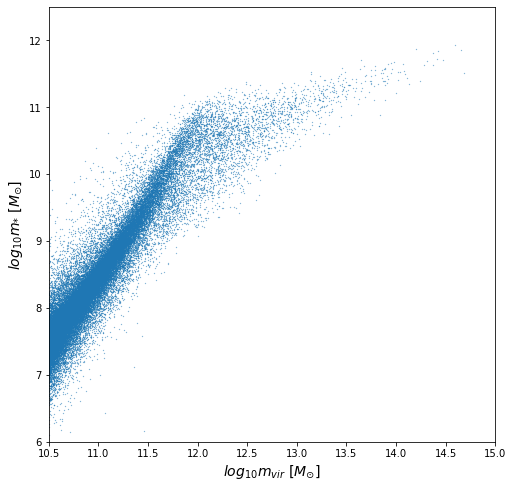

In [14]:
plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(np.log10(galprop['mhalo'] * 1e9), np.log10(galprop['mstar'] * 1e9), s = 0.05)
plt.xlabel('$log_{10} m_{vir}$ [$M_{\odot}$]', fontsize=14)
plt.xlim(10.5, 15)
plt.ylabel('$log_{10} m_{*}$ [$M_{\odot}$]', fontsize=14)
plt.ylim(6, 12.5)

# Bijective Matches to TNG

New to our catalogs, we have included bijective match results to TNG from our SubLink runs between Rockstar and TNG Subfind. We can do this using the 'HalopropSubfindID' field:

In [15]:
haloprop[['subfind-idx-FP', 'subfind-idx-DM']].values

array([[1692478, 1661415],
       [1791829, 1843120],
       [1181732, 1527464],
       ...,
       [4281054, 5007636],
       [1449290, 1629600],
       [     -1, 1244784]], dtype=int32)

where if a value is not -1, it means that host halo has been matched when matching Rockstar to Subfind and matching Subfind to Rockstar. Thus, we now have a method to walk between our subhalo / halo catalogs and TNG's subhalo / halo catalogs.

## Matching to Subfind Full Particle Physics 

For example, if we wanted to compare the two subhalo catalogs, we can filter out the satellites from our galprop, obtain the match ID from haloprop (since host halo contains only one central and we have this information), load and filter TNG's Subfind table, and analyze accordingly.

First we load our data from TNG:

In [16]:
site.addsitedir('/mnt/home/agabrielpillai/') 
import illustris_python as il

basePathTNG = '/mnt/ceph/users/agabrielpillai/IllustrisTNG/L75n1820TNG/output'

FP_subhalos_99 = il.groupcat.loadSubhalos(basePathTNG, 99, fields=['SubhaloMassInRadType', 'SubhaloGrNr'])
FP_halos_99 = il.groupcat.loadHalos(basePathTNG, 99, fields=['Group_M_TopHat200', 'GroupFirstSub'])

In [17]:
FP_subfind = pd.DataFrame()
FP_subfind['mstar'] = FP_subhalos_99['SubhaloMassInRadType'][:,4] # stellar mass 
FP_subfind['fof-idx'] = FP_subhalos_99['SubhaloGrNr']
FP_subfind['central'] = False
FP_subfind.loc[FP_halos_99['GroupFirstSub'][FP_halos_99['GroupFirstSub'] != -1], 'central'] = True

We then find our central subhalos in both the galprop and Subfind catalogs and use indexing to create matched tables.

In [18]:
SAM_centrals = galprop[galprop['sat_type'] == 0].reset_index(drop=True)
SAM_centrals = SAM_centrals.join(haloprop)
SAM_centrals = SAM_centrals[SAM_centrals['subfind-idx-FP'] != -1].reset_index(drop=True)

FP_centrals = FP_subfind.iloc[SAM_centrals['subfind-idx-FP']].reset_index(drop=False) 
FP_centrals['sam-idx'] = SAM_centrals.index.values
FP_centrals = FP_centrals[FP_centrals['central']].reset_index(drop=True) # double check if TNG is a central
SAM_centrals.iloc[FP_centrals['sam-idx']] # if some weren't centrals in TNG, we filter now filter them out in the SAM

FP_centrals.shape[0], SAM_centrals.shape[0]

(1236277, 1236277)

We now have a 1-to-1 table of SAM central subhalos and TNG central subhalos, allowing us to compare subhalos in both catalogs.

/cm/shared/sw/pkg/devel/python3/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


(-1.5, 1.5)

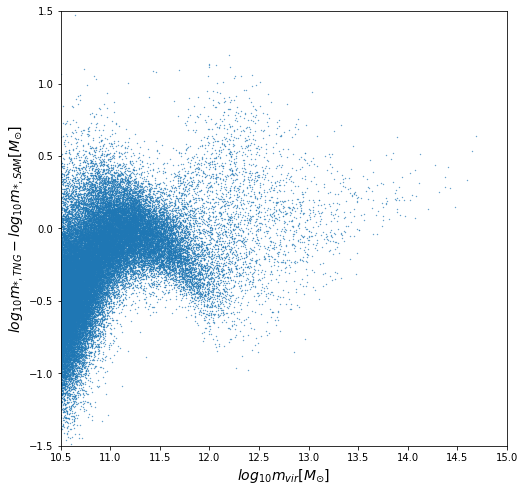

In [19]:
plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(np.log10(SAM_centrals['mhalo'] * 1e9), np.log10(FP_centrals['mstar'] * 1e10 / 0.6774) - np.log10(SAM_centrals['mstar'] * 1e9), s = 0.1)
plt.xlabel('$log_{10} m_{vir} [M_{\odot}]$', fontsize=14)
plt.xlim(10.5, 15)
plt.ylabel('$log_{10} m_{*, TNG} - log_{10} m_{*, SAM} [M_{\odot}]$', fontsize=14)
plt.ylim(-1.5, 1.5)

And if we wanted to compare to the two halo catalogs, we can use the link between haloprop and the Subfind table and the link between the Subfind and FoF table to get our results. 

In [20]:
FP_fof = pd.DataFrame()
FP_fof['mvir'] = FP_halos_99['Group_M_TopHat200'] 
FP_fof['subfind-idx'] = FP_halos_99['GroupFirstSub']

In [21]:
bijective_haloprop = haloprop[haloprop['subfind-idx-FP'] != -1].reset_index(drop=True)
bijective_FP = FP_fof.iloc[FP_subfind.loc[bijective_haloprop['subfind-idx-FP'], 'fof-idx'].values].reset_index(drop=True)
bijective_haloprop.shape[0], bijective_FP.shape[0]

(1236277, 1236277)

/cm/shared/sw/pkg/devel/python3/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


(-0.5, 0.5)

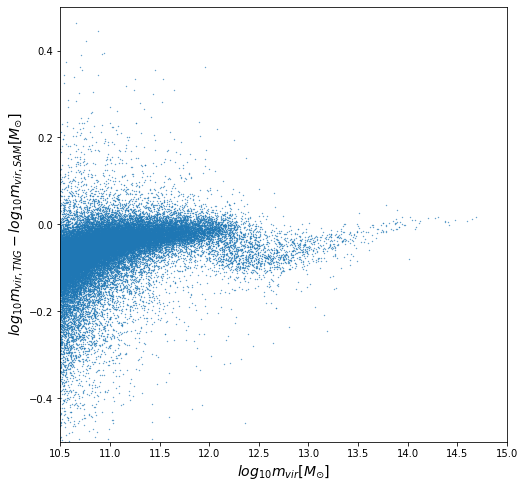

In [22]:
plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(np.log10(bijective_haloprop['mvir'] * 1e9), np.log10(bijective_FP['mvir'] * 1e10 / 0.6774) - np.log10(bijective_haloprop['mvir'] * 1e9), s = 0.1)
plt.xlabel('$log_{10} m_{vir} [M_{\odot}]$', fontsize=14)
plt.xlim(10.5, 15)
plt.ylabel('$log_{10} m_{vir, TNG} - log_{10} m_{vir, SAM} [M_{\odot}]$', fontsize=14)
plt.ylim(-0.5, 0.5)

## Matching Subfind Dark Matter Only

With this code basis, we can repeat the same process for getting DMO matches.

In [23]:
basePathTNG = '/mnt/ceph/users/agabrielpillai/IllustrisTNG/L75n1820TNG_DM/output'
DM_subhalos_99 = il.groupcat.loadSubhalos(basePathTNG, 99, fields=['SubhaloMassInRadType', 'SubhaloGrNr'])
DM_halos_99 = il.groupcat.loadHalos(basePathTNG, 99, fields=['Group_M_TopHat200', 'GroupFirstSub'])

DM_subfind = pd.DataFrame()
DM_subfind['fof-idx'] = DM_subhalos_99['SubhaloGrNr']
DM_subfind['central'] = False
DM_subfind.loc[DM_halos_99['GroupFirstSub'][DM_halos_99['GroupFirstSub'] != -1], 'central'] = True

DM_fof = pd.DataFrame()
DM_fof['mvir'] = DM_halos_99['Group_M_TopHat200'] 
DM_fof['subfind-idx'] = DM_halos_99['GroupFirstSub']

bijective_haloprop = haloprop[haloprop['subfind-idx-DM'] != -1].reset_index(drop=True)
bijective_DM = DM_fof.iloc[DM_subfind.loc[bijective_haloprop['subfind-idx-DM'], 'fof-idx'].values].reset_index(drop=True)
bijective_haloprop.shape[0], bijective_DM.shape[0]

(1227536, 1227536)

(-0.5, 0.5)

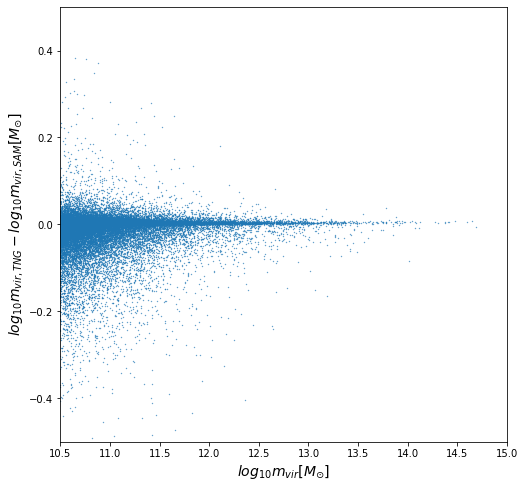

In [24]:
plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(np.log10(bijective_haloprop['mvir'] * 1e9), np.log10(bijective_DM['mvir'] * 1e10 / 0.6774) - np.log10(bijective_haloprop['mvir'] * 1e9), s = 0.1)
plt.xlabel('$log_{10} m_{vir} [M_{\odot}]$', fontsize=14)
plt.xlim(10.5, 15)
plt.ylabel('$log_{10} m_{vir, TNG} - log_{10} m_{vir, SAM} [M_{\odot}]$', fontsize=14)
plt.ylim(-0.5, 0.5)

# Loading Merger Trees

Coming soon!

# Loading Different Boxes

Our TNG-SAM catalogs also include catalogs for the TNG300 and TNG50 boxes. To utilize them, you have to set up your directory in the same manner as TNG100 and create basePaths for the two other volumes. (Loading TNG300 takes a large amount of resources. To properly utilize, experiment on smaller sets of subvolumes first). 

In [25]:
basePath300 = '/mnt/ceph/users/agabrielpillai/tng-sam/L205n2500TNG/'
basePath50 = '/mnt/ceph/users/agabrielpillai/tng-sam/L35n2160TNG/'

fields=['GalpropHaloIndex', 'GalpropMhalo', 'GalpropMstar', 'GalpropSatType']

subhalos_99_300 = ilsam.groupcat.load_snapshot_subhalos(basePath300, 99, genFullSubvolumes(7), fields=fields)
subhalos_99_50 = ilsam.groupcat.load_snapshot_subhalos(basePath50, 99, genFullSubvolumes(6), fields=fields)

In [26]:
def genGalpropDF(SAM_subhalos):
    galprop = pd.DataFrame()
    galprop['mhalo'] = SAM_subhalos['GalpropMhalo']
    galprop['mstar'] = SAM_subhalos['GalpropMstar']
    galprop['sat_type'] = SAM_subhalos['GalpropSatType']
    return galprop 

In [27]:

galprop_50 = genGalpropDF(subhalos_99_50)
galprop_300 = genGalpropDF(subhalos_99_300)

galprop_50 = galprop_50[galprop_50['sat_type'] == 0].reset_index(drop=True)
galprop_300 = galprop_300[galprop_300['sat_type'] == 0].reset_index(drop=True)

/cm/shared/sw/pkg/devel/python3/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/cm/shared/sw/pkg/devel/python3/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/cm/shared/sw/pkg/devel/python3/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


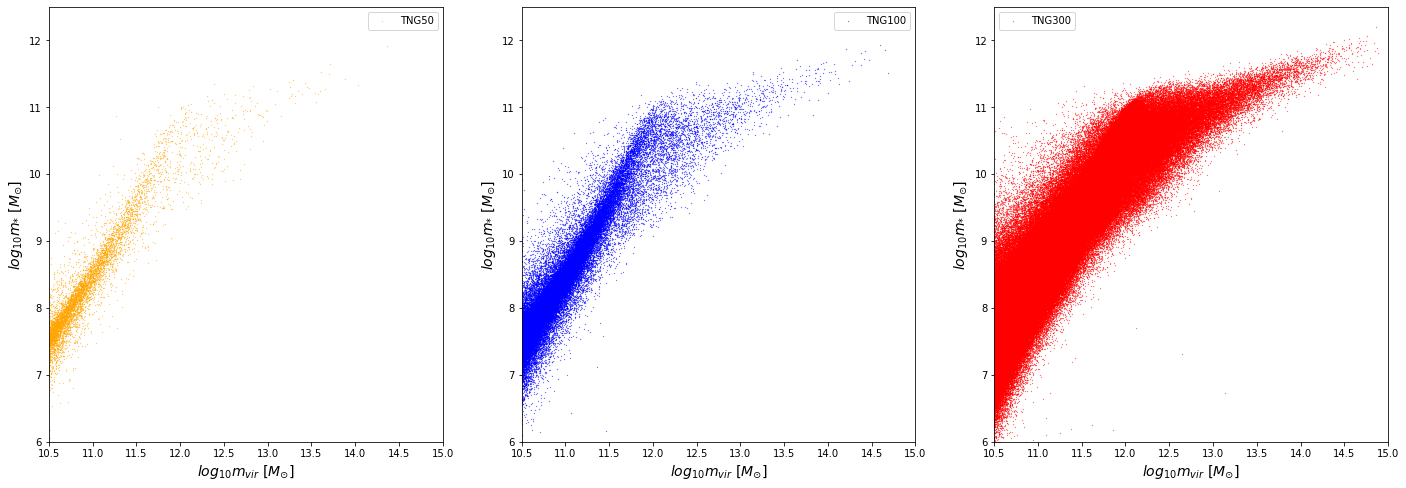

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(24, 8))
ax[0].scatter(np.log10(galprop_50['mhalo'] * 1e9), np.log10(galprop_50['mstar'] * 1e9), s = 0.05, c='orange', label='TNG50')
ax[1].scatter(np.log10(galprop['mhalo'] * 1e9), np.log10(galprop['mstar'] * 1e9), s = 0.05, c='blue', label='TNG100')
ax[2].scatter(np.log10(galprop_300['mhalo'] * 1e9), np.log10(galprop_300['mstar'] * 1e9), s = 0.05, c='red', label='TNG300')

for i in range(0, 3):
    ax[i].set_xlabel('$log_{10} m_{vir}$ [$M_{\odot}$]', fontsize=14)
    ax[i].set_ylabel('$log_{10} m_{*}$ [$M_{\odot}$]', fontsize=14)
    ax[i].set_xlim(10.5, 15)
    ax[i].set_ylim(6, 12.5)
    ax[i].legend()